In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import keras

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
X_train[1].shape

(32, 32, 3)

In [ ]:
y_train[1].shape

(1,)

We now create a list of labels corresponding to the 10 categories.  It will be used to convert the 0-9 digits in the target arrays to string labels. The categories are labeled as follows:

  0. airplane
  1. automobile
  2. bird
  3. cat
  4. deer
  5. dog
  6. frog
  7. horse
  8. ship
  9. truck


In [ ]:
List=["Airplane","automobile","bird","cat","deer","dog","frog","horse","sheep","truck"]

**3) Normalize the image data from [0,255] to be [0,1].  Normalizing improves model training (to test this, you can comment out the normalization later).**

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

**4) Convert the target arrays to one-hot encodings.  Hint: checkout the [`keras.utils.np_utils.to_categorical()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)**

In [ ]:
import keras as k
y_train = k.utils.to_categorical(y_train)
y_test = k.utils.to_categorical(y_test)

**5) Visualize some images in each category using the `imshow()` function in `matplotlib.pyplot`.  Can you recreate the figure below?  Hint: the below figure was created using the first 8 images belonging to each category in the training data.**

![Dataset.png](attachment:Dataset.png)

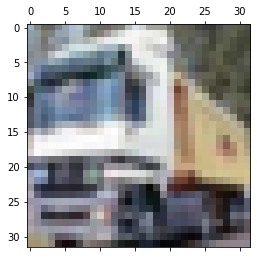

In [ ]:
plt.matshow(X_train[1])


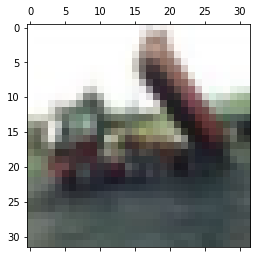

In [ ]:
plt.matshow(X_train[2])

<a id='first_model'></a>

# 2 - First naive model

In order to better understand the importance of CNNs, it is instructive to first see how well a naive dense network performs on the dataset.

**6) Create a sequential model with 4 `Dense` hidden layers of 2048, 1024, 512, and 256 nodes each, with ReLU activation, and a final output layer of 10 nodes. Compile the model with a `categorical_crossentropy` loss, using the SGD optimizer, and the `accuracy` metric. 
Note that you will need to use the `Flatten` layer first in order to convert the 3D (x, y, rgb) image data into 1D.**

In [ ]:
# Flattening the dataset inputs
X_train_flattened = X_train.reshape(len(X_train), 32*32*3)
X_test_flattened = X_test.reshape(len(X_test), 32*32*3)
X_test_flattened.shape

(10000, 3072)

In [ ]:
from keras.backend import batch_normalization
model=keras.models.Sequential()
model.add(Dense(2048, input_shape=(3072,), activation='relu'))
keras.layers.BatchNormalization(),
model.add(Dense(1024, activation='relu'))
keras.layers.BatchNormalization(),
model.add(Dense(512, activation='relu'))
keras.layers.BatchNormalization(),
model.add(Dense(256, activation='relu'))
keras.layers.BatchNormalization(),
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.8483 - accuracy: 0.3365 - val_loss: 1.7821 - val_accuracy: 0.3546
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6463 - accuracy: 0.4129 - val_loss: 1.9162 - val_accuracy: 0.3204


**7) Compute by hand the total number of trainable parameters (weights and biases) in the model.**

*9,050,378*

**8) Use the `summary()` function on model to get a text summary of the model.  Did you compute the number of parameters correctly?**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 9,050,378
Trainable params: 9,050,378
Non-trainable params: 0
_________________________________________________________________


**9) Train the model:**
  - Start with a small batch size of 32 and train for 10 epochs
  - Use early stopping on the validation accuracy with a patience of 2 (use 10% of your training set as the validation set)
  
**How does the model perform?**

In [ ]:
model.fit(X_train_flattened, y_train, epochs=10,batch_size=32 )

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2393 - accuracy: 0.5575
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1993 - accuracy: 0.5745
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1634 - accuracy: 0.5874
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1295 - accuracy: 0.6000
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0927 - accuracy: 0.6120
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0585 - accuracy: 0.6238
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0223 - accuracy: 0.6363
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9867 - accuracy: 0.6485
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9552 - accuracy: 0.6600
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.921

In [ ]:
model.fit(X_train_flattened, y_train,epochs=10,batch_size=32, validation_split=0.1,callbacks=EarlyStopping(monitor='val_loss'))

Epoch 1/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8844 - accuracy: 0.6867 - val_loss: 1.2339 - val_accuracy: 0.5774
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8465 - accuracy: 0.6995 - val_loss: 1.1726 - val_accuracy: 0.5814


**10) Try changing the batch size to see if there is any improvement.**

In [ ]:
model.fit(X_train_flattened, y_train, epochs=10,batch_size=50 )

Epoch 1/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5394 - accuracy: 0.4526
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.4854 - accuracy: 0.4700
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.4374 - accuracy: 0.4889
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.4012 - accuracy: 0.5035
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3629 - accuracy: 0.5184
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.3275 - accuracy: 0.5279
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.2933 - accuracy: 0.5396
Epoch 8/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2637 - accuracy: 0.5515
Epoch 9/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2341 - accuracy: 0.5634
Epoch 10/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.207

**11) Try adding batch normalization after each hidden layer.  Any better?**

In [ ]:
# I have already added Batch normalization layer, adding batch normalization layer increases the accuracy of model

<a id='cnn'></a>

# 3 - Convolutional Neural Network
 

Convolutional neural networks allow us to do drastically better on this dataset (and many image classification problems in general). In this task, you will build a convolutional network and see how it performs during training.

**12) Create a new model with the following layers**
  - 3x3 2D convolution with zero padding (same), 32 filters
  - ReLU activation
  - 3,3 2D convolution, no padding, 32 filters
  - ReLU activation
  - Max pooling with size (2,2)
  - 3x3 2D convolution, no padding, 64 filters
  - ReLU activation
  - 3x3 2D convolution, no padding, 64 filters
  - ReLU activation
  - Max pooling with size (2,2)
  - Flatten
  - Dense layer with 512 nodes, ReLU activation
  - Softmax output layer with 10 nodes
  
**Compile the network with same optimizer and metrics as the dense network.**  

In [ ]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**13) Compute by hand the number of trainable parameters in this network.  Are there more or less than the more simple dense network?  Why?  Confirm with `summary()`.**

In [ ]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_27 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)       

In [ ]:
# ANN has greater number of trainable parameters as compare to CNN, because we have added layer in ANN that's why layers have increased the number of trainable parameters in simple neural network.(ANN)

**14) Use the same training procedure as before for 10 epochs and batch size of 32. How does the validation accuracy change with each epoch?**

In [ ]:
cnn.fit(X_train, y_train, epochs=10, batch_size=32 )

Epoch 1/10
1563/1563 [==============================] - 16s 5ms/step - loss: 1.5037 - accuracy: 0.4774
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0744 - accuracy: 0.6226
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8987 - accuracy: 0.6864
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8091 - accuracy: 0.7158
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7392 - accuracy: 0.7428
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6704 - accuracy: 0.7627
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6235 - accuracy: 0.7829
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5839 - accuracy: 0.7943
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5577 - accuracy: 0.8044
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.51

**15) Increase the batch size to 64 and retrain.  Better or worse?  Try 128 as well.  How does increasing the batch size improve the training?**

In [ ]:
cnn.fit(X_train, y_train, epochs=10, batch_size=64 )

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.3691 - accuracy: 0.8700
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.3256 - accuracy: 0.8837
Epoch 3/10
782/782 [==============================] - 7s 8ms/step - loss: 0.3072 - accuracy: 0.8903
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 0.2851 - accuracy: 0.8978
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2619 - accuracy: 0.9061
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2489 - accuracy: 0.9115
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2316 - accuracy: 0.9153
Epoch 8/10
782/782 [==============================] - 7s 8ms/step - loss: 0.2128 - accuracy: 0.9251
Epoch 9/10
782/782 [==============================] - 7s 10ms/step - loss: 0.2007 - accuracy: 0.9287
Epoch 10/10
782/782 [==============================] - 7s 10ms/step - loss: 0.1870 - accuracy: 0.93

In [ ]:
cnn.fit(X_train, y_train, epochs=10, batch_size=128 )

Epoch 1/10
391/391 [==============================] - 5s 13ms/step - loss: 0.1174 - accuracy: 0.9607
Epoch 2/10
391/391 [==============================] - 5s 12ms/step - loss: 0.0989 - accuracy: 0.9670
Epoch 3/10
391/391 [==============================] - 5s 12ms/step - loss: 0.0901 - accuracy: 0.9684
Epoch 4/10
391/391 [==============================] - 5s 13ms/step - loss: 0.0866 - accuracy: 0.9705
Epoch 5/10
391/391 [==============================] - 5s 13ms/step - loss: 0.0877 - accuracy: 0.9701
Epoch 6/10
391/391 [==============================] - 5s 13ms/step - loss: 0.0853 - accuracy: 0.9712
Epoch 7/10
391/391 [==============================] - 5s 12ms/step - loss: 0.0890 - accuracy: 0.9686
Epoch 8/10
391/391 [==============================] - 5s 12ms/step - loss: 0.0841 - accuracy: 0.9699
Epoch 9/10
391/391 [==============================] - 5s 12ms/step - loss: 0.0885 - accuracy: 0.9692
Epoch 10/10
391/391 [==============================] - 4s 11ms/step - loss: 0.0854 - accura

**16) Note how the validation accuracy begins to decrease at some point, while the training accuracy continues to increase.  What is this phenomena called?  Try adding 3 dropout layers to the model, one before each max pooling layer and one before the last layer, using a dropout ratio of 0.25.  Does this improve the model?**

In [ ]:
#  Overfitting. Value of accuracy after adding dropout = 0.83

**17) Play with batch normalization.  For example, add batch normalization layers after each dropout layer.  Do you notice a faster increase in the model improvement? Why?**

In [ ]:
# Accuracy is 0.88 after adding batch normalization

<a id='results'></a>

# 4 - Interpreting the results
 
<a id='results_prediction'></a>

## 4.1 - Making predictions

Assuming all went well during the previous tasks, you can now predict the category of a new image!  Here are a few examples of my predictions:

![Results.png](attachment:Results.png)

**18) Use `predict` on your trained model to test its prediction on a few example images of the test set. Using `imshow` and `hbar` from `matplotlib.pyplot`, try to recreate the image above for a few example images.**

<!---**Hint:** at this point, it is probably convenient to use the `save` and `load_model` functions from Keras.  You can save the model after training it, and then decide to load from saved file instead of building a new one (if available) on successive runs.--->

<a id='results_evaluation'></a>

## 4.2 Evaluating the results

A confusion matrix is often used in supervised learning to understand how well (or not) each category is being classified.  Each element (i,j) in the confusion matrix represents the predicted class j for each true class i.  Consider the following 10 predictions for a 2 category model predicting male or female:

| example     | true category  | predicted category  |
|-------------|----------------|---------------------|
| 1           | male           | male                |
| 2           | female         | male                |
| 3           | female         | female              |
| 4           | male           | male                |
| 5           | male           | female              |
| 6           | male           | male                |
| 7           | female         | female              |
| 8           | male           | female              |
| 9           | female         | female              |
| 10          | female         | female              |

Based on the above data, the model is accurate 70% of the time.  The confusion matrix is

|        | male | female |
|--------|------|--------|
| male   | 3    | 2      |
| female | 1    | 4      |

The confusion matrix gives us more information than a simple accuracy measurement.  In this case, we see that the class female has a higher accuracy over male.  

**19) Create the confusion matrix for the CIFAR-10 dataset using the test data.  What does it tell you about the relationships between each class?**

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.91      0.88      0.90      1000
           2       0.71      0.73      0.72      1000
           3       0.62      0.64      0.63      1000
           4       0.70      0.80      0.75      1000
           5       0.73      0.69      0.71      1000
           6       0.78      0.89      0.83      1000
           7       0.91      0.77      0.84      1000
           8       0.91      0.82      0.86      1000
           9       0.91      0.82      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



<a id='pretrained_cnn'></a>
# 5 - Improving on current performances

**20) Play with different CNN architectures. Provide a few attempts (atleast 1 and atmost 3)**

In [ ]:
# 20) LeNet_CNN
LeNet = keras.models.Sequential()

LeNet.add(keras.layers.Conv2D(6, (5,5), activation = 'relu', input_shape= (32,32,1)))
LeNet.add(keras.layers.AveragePooling2D())

LeNet.add(keras.layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(keras.layers.AveragePooling2D())

LeNet.add(keras.layers.Flatten())

LeNet.add(keras.layers.Dense(120, activation='relu'))

LeNet.add(keras.layers.Dense(84, activation='relu'))

LeNet.add(keras.layers.Dense(43, activation='softmax'))
LeNet.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_34 (Dense)            (None, 120)              

Note that several pre-trained networks are directly accessible via keras (see https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/5.3-using-a-pretrained-convnet.ipynb)